In [ ]:
!pip install contractions --quiet
!pip install streamlit --quiet
!pip install pyngrok==4.1.1 --quiet

     |████████████████████████████████| 327kB 8.8MB/s 
     |████████████████████████████████| 286kB 36.6MB/s 
     |████████████████████████████████| 8.2MB 7.2MB/s 
     |████████████████████████████████| 81kB 11.4MB/s 
     |████████████████████████████████| 4.2MB 50.2MB/s 
     |████████████████████████████████| 174kB 55.2MB/s 
     |████████████████████████████████| 112kB 50.7MB/s 
     |████████████████████████████████| 122kB 57.0MB/s 
     |████████████████████████████████| 71kB 10.5MB/s 
ERROR: google-colab 1.0.0 has requirement ipykernel~=4.10, but you'll have ipykernel 5.5.5 which is incompatible.


In [ ]:
#Packages

import pandas as pd
import nltk
import requests
from bs4 import BeautifulSoup
import contractions
import re
from nltk.tokenize.toktok import ToktokTokenizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.pipeline import Pipeline
import joblib
from pyngrok import ngrok

In [13]:
df= pd.read_csv('/content/drive/MyDrive/IMDB Dataset.csv')
df=df.iloc[:1000,:]
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


# New Section

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [14]:
nltk.download('stopwords')
stopword_list = nltk.corpus.stopwords.words('english')
stopword_list.remove('no')
stopword_list.remove('not')
len(stopword_list)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


177

In [15]:
#HTML tag

def html_tag(text):
  soup = BeautifulSoup(text,"html.parser")
  new_text = soup.get_text()
  return new_text

#Expand Contractions

def con(text):
  expand = contractions.fix(text)
  return expand
con("Y'all can't expand I'd think")

#Removing the Special Characters

def remove_sp(text):
  pattern = r'[^A-Za-z0-9\s]'
  text = re.sub(pattern,'',text)
  return text

#Remove Stopwords

tokenizer = ToktokTokenizer()
def remove_stopwords(text):
  tokens = tokenizer.tokenize(text)
  tokens = [token.strip() for token in tokens]
  filtered_tokens = [token for token in tokens if token not in stopword_list]
  filtered_text = ' '.join(filtered_tokens)
  return filtered_text


In [16]:
df.review = df.review.apply(lambda x:x.lower())
df.review = df.review.apply(html_tag)
df.review = df.review.apply(con)
df.review = df.review.apply(remove_sp)
df.review = df.review.apply(remove_stopwords)

<ipython-input-15-632d57faa571>:4: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text,"html.parser")


In [17]:
df.head()

,review,sentiment
0,one reviewers mentioned watching 1 oz episode ...,positive
1,wonderful little production filming technique ...,positive
2,thought wonderful way spend time hot summer we...,positive
3,basically family little boy jake thinks zombie...,negative
4,petter matteis love time money visually stunni...,positive


In [18]:
x=df['review'].values
y=df['sentiment'].values

<Axes: >

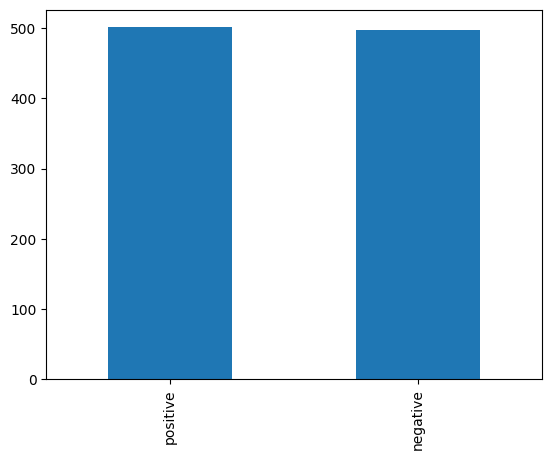

In [19]:
df['sentiment'].value_counts().plot(kind='bar')

In [20]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=0)
print(x_train.shape)
print(x_test.shape)

(749,)
(250,)


In [21]:
vect = TfidfVectorizer()
x_train_v = vect.fit_transform(x_train)
x_test_v = vect.transform(x_test)

In [22]:
model = SVC()
model.fit(x_train_v,y_train)
y_pred = model.predict(x_test_v)
y_pred

array(['positive', 'negative', 'positive', 'negative', 'negative',
       'positive', 'positive', 'negative', 'positive', 'positive',
       'negative', 'negative', 'negative', 'positive', 'negative',
       'positive', 'negative', 'positive', 'negative', 'negative',
       'negative', 'negative', 'positive', 'positive', 'negative',
       'positive', 'negative', 'negative', 'negative', 'negative',
       'positive', 'negative', 'negative', 'negative', 'positive',
       'positive', 'negative', 'negative', 'negative', 'negative',
       'negative', 'positive', 'negative', 'positive', 'negative',
       'positive', 'positive', 'positive', 'positive', 'positive',
       'negative', 'negative', 'positive', 'positive', 'positive',
       'positive', 'positive', 'positive', 'positive', 'negative',
       'positive', 'positive', 'positive', 'negative', 'positive',
       'positive', 'negative', 'positive', 'positive', 'negative',
       'negative', 'positive', 'positive', 'positive', 'positi

In [23]:
accuracy_score(y_pred,y_test)

0.816

In [24]:
confusion_matrix(y_pred,y_test)

array([[ 98,  16],
       [ 30, 106]])

In [25]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

    negative       0.77      0.86      0.81       114
    positive       0.87      0.78      0.82       136

    accuracy                           0.82       250
   macro avg       0.82      0.82      0.82       250
weighted avg       0.82      0.82      0.82       250



In [26]:
# Evaluating for a specific message

text = df['review'][10]
print(text)
df['sentiment'][10]

phil alien one quirky films humour based around oddness everything rather actual punchlinesat first odd pretty funny movie progressed not find jokes oddness funny anymoreits low budget film never problem pretty interesting characters eventually lost interesti imagine film would appeal stoner currently partakingfor something similar better try brother another planet


'negative'

In [27]:
text=vect.transform([text])
model.predict(text)

array(['negative'], dtype=object)

In [28]:
text_model = Pipeline([('vect',TfidfVectorizer()),('model',SVC())])

In [29]:
text_model.fit(x_train,y_train)

Pipeline(steps=[('vect', TfidfVectorizer()), ('model', SVC())])

In [30]:
y_pred=text_model.predict(x_test)

In [31]:
# Evaluating for a specific message

text = df['review'][10]
text_model.predict([text])

array(['negative'], dtype=object)

In [32]:
joblib.dump(text_model,'sentiment_analyzer')

['sentiment_analyzer']

In [33]:
%%writefile app.py
import streamlit as st
import joblib
model=joblib.load('sentiment_analyzer')
st.title('Sentiment Analyzer')
ip = st.text_input("Enter the Review")
op = model.predict([ip])
if st.button('Predict'):
  st.title(op[0])

Writing app.py


In [39]:
import subprocess
from pyngrok import ngrok

# Set your ngrok authtoken here
ngrok.set_auth_token("2aFaJAZdPj3tN0moeQtkNZwzUpm_3FvjxDCJdajDAMfrvkeUR")

# Run Streamlit app in the background
subprocess.Popen(["nohup", "streamlit", "run", "app.py", "&"])

# Connect ngrok to the Streamlit app
url = ngrok.connect(port='8501')

# Print the ngrok URL
print(url)

http://3794-34-106-127-232.ngrok-free.app
